# Exploring GDP and Life Expectancy in Six Nations
    
In this project we will be exploring the relationship between a nation's gross domestic product and the life expectancy of that nation's people. We will analyze data from World Bank and World Health Organization and try to answer the following questions.

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?
- What is the average GDP in these nations?
- What is the distribution of that GDP?

## Import Modules

We will be using several modules to analyze our data including pandas, matplotlib, and seaborn.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
%matplotlib inline

## Load Data and Preliminary Inspection
We will read the data from a CSV file and find out how many rows and columns we will be analyzing as well as what kind of information those columns contain.

In [60]:
df = pd.read_csv('all_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


We have 96 rows and 4 columns. Our columns are 'Country', 'Year', 'Life expectancy at birth (years)', and 'GDP'. Each column contains 96 non-null items.

In [61]:
print(df.Country.unique())
print(df.Year.unique())
print(df.Country.value_counts())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64


We can see that we have 6 nations and 16 years of data on each nation. Our nations are Chile, China, Germany, Mexico, United States of America, and Zimbabwe. Our years are 2000 to 2015. With only 96 rows it is easy to visually inspect the data for missing values or cleaning by examing the CSV file in a text editor. The data is clean and no values are missing but we will be renaming the column 'Life expectancy at birth (years)' to 'Life_expectancy' to make coding easier. We will also change 'United States of America' to 'USA' to fit on our visualizations better.

In [62]:
df = df.rename({'Life expectancy at birth (years)': 'Life_expectancy'}, axis='columns')
df['Country'] = df['Country'].replace(['United States of America'],'USA')


## Life Expectancy Over Time
Next we will answer the question of whether life expectancy has increased over time in these six nations. We will do this by plotting a line graph of life expectancy in each nation against the years for which we have data.

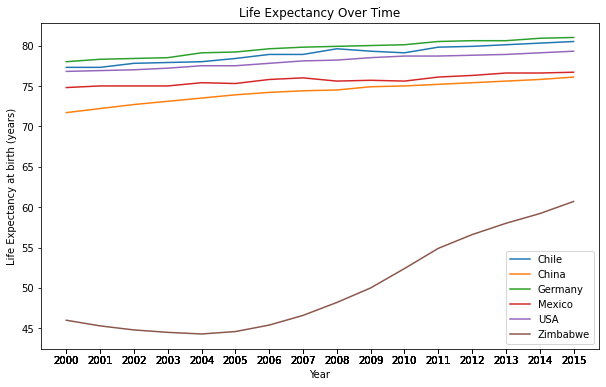

<Figure size 432x288 with 0 Axes>

In [63]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.Year, y=df.Life_expectancy, hue=df.Country)
ax = plt.subplot()
plt.title('Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at birth (years)')
ax.set_xticks(df.Year)
plt.legend()
plt.show()
plt.clf()

From this plot we can see that the life expectancy in 2015 is greater than the life expectancy in 2000 for every nation. In Zimbabwe life expectancy decreased from 2000 to 2004 but then increased by around 15 years between 2004 and 2015. The life expectancy of the people of every other nation steadily increased from over the course of our data except for a few slight decreases. 

## GDP Over Time
We will now answer the question of whether GDP has increased over time in these six nations. We will do this by plotting a line graph of GDP in each nation against the years for which we have data.

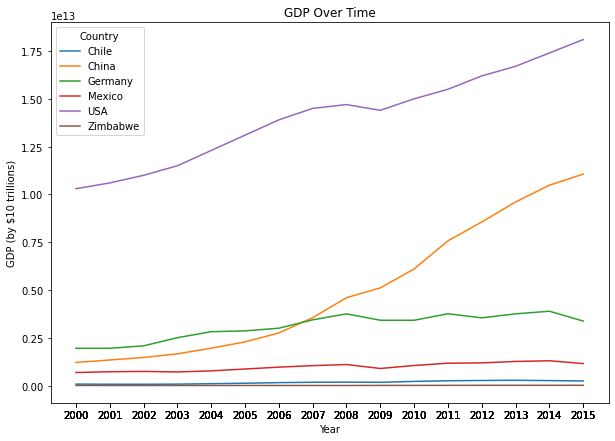

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
ax = plt.subplot()
plt.title('GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (by $10 trillions)')
ax.set_xticks(df.Year)
plt.show()
plt.clf()

We can see that the United States of America, China, and Germany have GDPs that are higher in 2015 than in 2000, but it is difficult to see how the other three nations faired. This is because the GDPs of Chile, Mexico, and Zimbabwe are all at least one order of magnitude less than the other three nations. We will add a new column to our dataframe that contains the logarithm base 10 of each nations GDP and then plot a line graph as we did before and we will show grid lines so we can see more clearly. It is worth noting that when we look at a logarithmic scale (base 10) an increase by one point corresponds to an increase by 900% while a decrease of one point corresponds to a decrease by 90%.

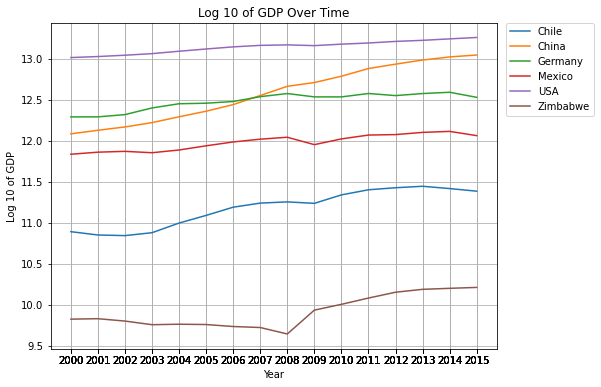

<Figure size 432x288 with 0 Axes>

In [65]:
df['log_GDP'] = np.log10(df.GDP)
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.Year, y=df.log_GDP, hue=df.Country)
ax = plt.subplot()
plt.title('Log 10 of GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Log 10 of GDP')
ax.set_xticks(df.Year)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.show()
plt.clf()

Now we can see how Chile, Mexico, and Zimbabwe faired. All three have a higher logarithm base 10 of their GDP in 2015 than they did in 2000 which means that all of their GDPs increased over time. While some nations had periods where their GDP decreased, all nations have a higher GDP in 2015 than they did in 2000. Most remarkably is China, which increased it's GDP by about 900%.

## GDP and Life Expectancy
Next we will examine if there is a relationship between GDP and life expectancy. To do this we will make a scatter plot of life expectancy against GDP.

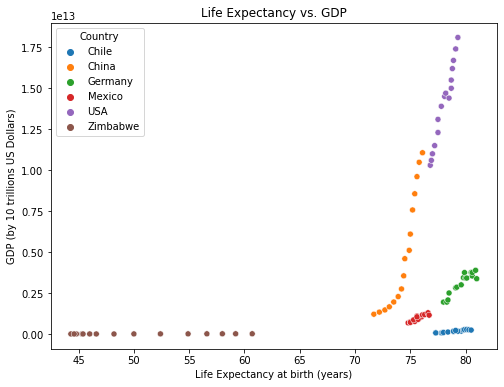

The Pearson correlation coeffecient for the full data set is 0.34321


<Figure size 432x288 with 0 Axes>

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(y=df.GDP, x=df.Life_expectancy, hue=df.Country)
plt.title('Life Expectancy vs. GDP')
plt.xlabel('Life Expectancy at birth (years)')
plt.ylabel('GDP (by 10 trillions US Dollars)')
plt.show()
plt.clf()
corr_Life_expectancy_GDP, p = pearsonr(df.Life_expectancy, df.GDP)
print('The Pearson correlation coeffecient for the full data set is', round(corr_Life_expectancy_GDP, 5))

Based on the Pearson correlation coefficient there is a correlation but it is weak. Again it is difficult to see Chile and Zimbabwe so we will make seperate scatter plots for each nation, and examine the Pearson correlation in each nation.

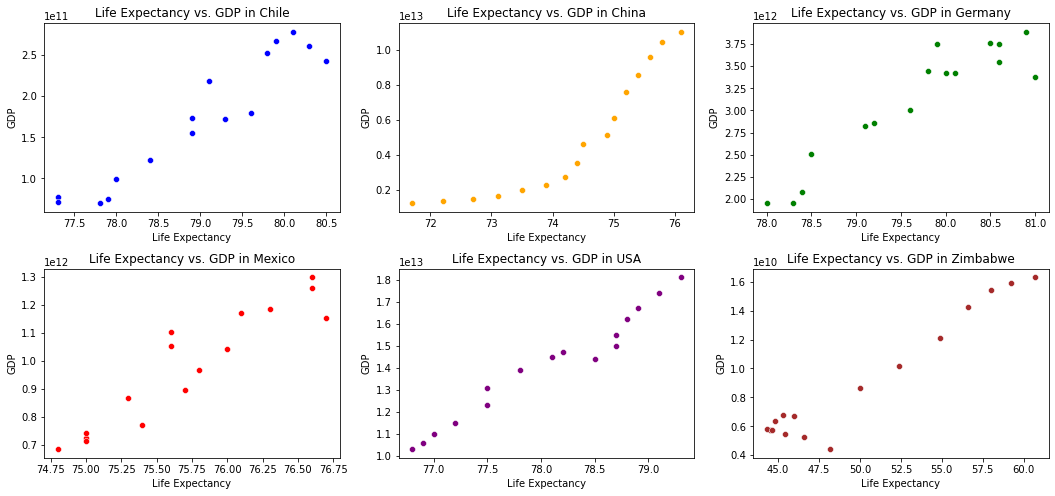

The Pearson correlation coeffecient for Chile is 0.94988
The Pearson correlation coeffecient for China is 0.90853
The Pearson correlation coeffecient for Germany is 0.9327
The Pearson correlation coeffecient for Mexico is 0.93224
The Pearson correlation coeffecient for USA is 0.98171
The Pearson correlation coeffecient for Zimbabwe is 0.9662


<Figure size 432x288 with 0 Axes>

In [67]:
countries = df.Country.unique()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
corrs = []
plt.figure(figsize=(18, 8))
for i in range(len(countries)):
    country_df = df[df.Country == countries[i]]
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(y=country_df.GDP, x=country_df.Life_expectancy, color=colors[i])
    plt.title('Life Expectancy vs. GDP in {}'.format(countries[i]))
    plt.ylabel('GDP')
    plt.xlabel('Life Expectancy')
    corr_Life_expectancy_GDP, p = pearsonr(country_df.Life_expectancy, country_df.GDP)
    corrs.append(corr_Life_expectancy_GDP)

plt.subplots_adjust(hspace=0.3)
plt.show()
plt.clf()
for i in range(len(countries)):
    print('The Pearson correlation coeffecient for {} is {}'.format(countries[i], round(corrs[i], 5)))

Now we can see a positive linear relationship between life expectancy and GDP and that there is a strong positive correlation between these two factors when we look at each nation individually. We can also use linear regression to find a line of best fit.

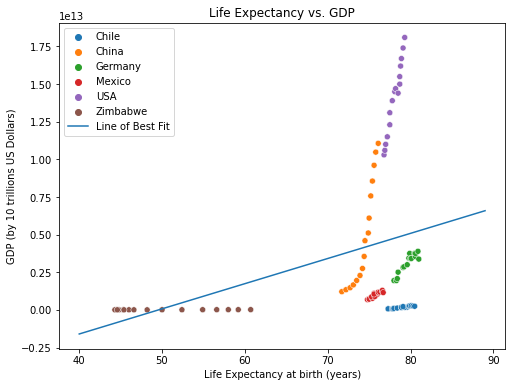

<Figure size 432x288 with 0 Axes>

In [68]:
model = sm.OLS.from_formula('GDP ~ Life_expectancy', data=df).fit()
xs = range(40, 90)
ys = [model.params[1] * x + model.params[0] for x in xs]
plt.figure(figsize=(8, 6))
sns.scatterplot(y=df.GDP, x=df.Life_expectancy, hue=df.Country)
sns.lineplot(x=xs, y=ys, label='Line of Best Fit')
plt.title('Life Expectancy vs. GDP')
plt.xlabel('Life Expectancy at birth (years)')
plt.ylabel('GDP (by 10 trillions US Dollars)')
plt.show()
plt.clf()

This line of best fit is not very good but that was expected after finding the weak correlation.

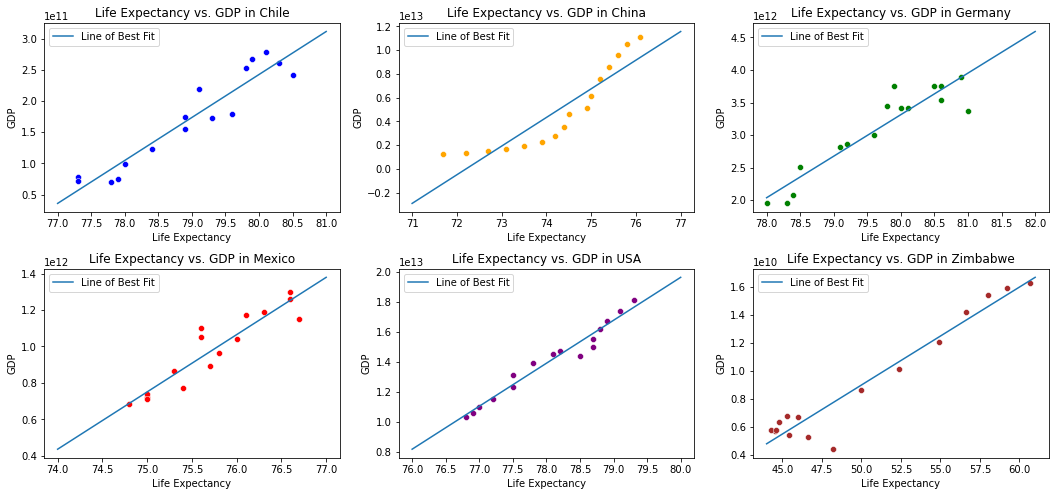

<Figure size 432x288 with 0 Axes>

In [69]:
countries = df.Country.unique()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
corrs = []
plt.figure(figsize=(18, 8))
for i in range(len(countries)):
    country_df = df[df.Country == countries[i]]
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(y=country_df.GDP, x=country_df.Life_expectancy, color=colors[i])
    plt.title('Life Expectancy vs. GDP in {}'.format(countries[i]))
    plt.ylabel('GDP')
    plt.xlabel('Life Expectancy')
    model = sm.OLS.from_formula('GDP ~ Life_expectancy', data=country_df).fit()
    xs = range(int(country_df.Life_expectancy.min()), int(country_df.Life_expectancy.max() + 2))
    ys = [model.params[1] * x + model.params[0] for x in xs]
    sns.lineplot(x=xs, y=ys, label='Line of Best Fit')
    corr_Life_expectancy_GDP, p = pearsonr(country_df.Life_expectancy, country_df.GDP)
    corrs.append(corr_Life_expectancy_GDP)

plt.subplots_adjust(hspace=0.3)
plt.show()
plt.clf()

These lines fit the data much better with the correlation coeffecients all being above 0.9.

## Average Life Expectancy
Now we will answer the question of what is the average life expectancy of each nation.

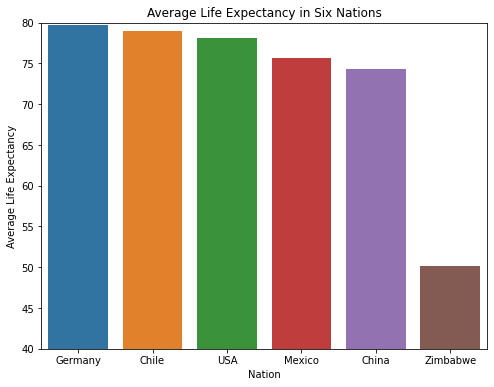

<Figure size 432x288 with 0 Axes>

In [70]:
dfMeans = df.drop('Year', axis=1).drop('log_GDP', axis=1).groupby('Country').mean().reset_index()
dfMeans = dfMeans.sort_values('Life_expectancy', ascending=[0])
plt.figure(figsize=(8, 6))
sns.barplot(y=dfMeans.Life_expectancy, x=dfMeans.Country)
plt.title('Average Life Expectancy in Six Nations')
plt.ylabel('Average Life Expectancy')
plt.xlabel('Nation')
plt.ylim([40, 80])
plt.show()
plt.clf()

We can see that Germany has the highest average life expectancy at just under 80 years, then Chile, USA, Mexico, and China. Zimbabwe with an average life expectancy of 50 years is much lower than the second lowest, China, by almost 25 years. 

## Distribution of Life Expectancy
We will also plot a histogram to examine the distribution of life expectancy.

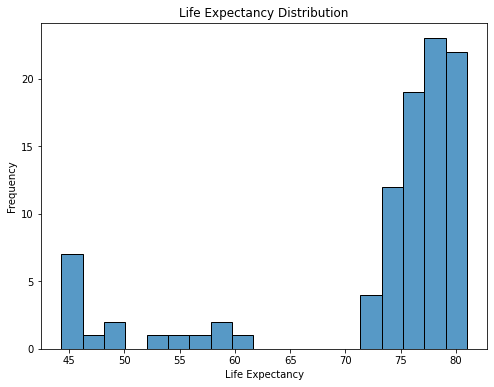

<Figure size 432x288 with 0 Axes>

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(df.Life_expectancy)
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()
plt.clf()

We only have 96 data points so it is difficult to get an accurate view of the distribution. We can see that Zimbabwe adds all of the data points that are below 65 and skews our histogram to the left. Let's see what our histogram looks like without Zimbabwe.

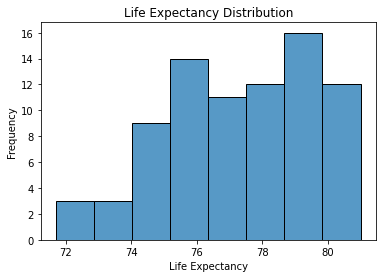

<Figure size 432x288 with 0 Axes>

In [72]:
no_Zim_df = df[df.Country != 'Zimbabwe']
sns.histplot(no_Zim_df.Life_expectancy)
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()
plt.clf()

Now we can see our distribution slightly better but we still have an issue. Because our observations of life expectancy generally increase over time we would expect our data to be skewed to the left. It may be that if we had data from many more nations that corresponded to just one time period the distribution for life expectancy would be close to normal.

## Average GDP
Let's examine GDP the same way we examined life expectancy.

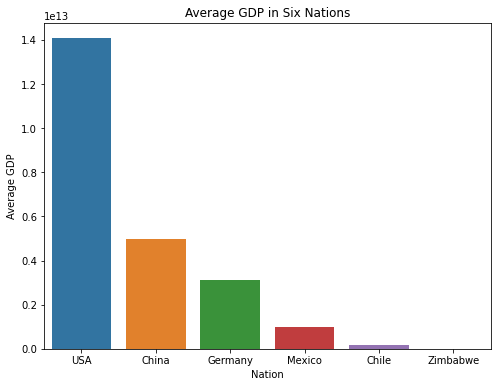

,Country,GDP
0,USA,1.407500e+13
1,China,4.957714e+12
2,Germany,3.094776e+12
3,Mexico,9.766506e+11
4,Chile,1.697888e+11
5,Zimbabwe,9.062580e+09


<Figure size 432x288 with 0 Axes>

In [73]:
dfMeans = dfMeans.sort_values('GDP', ascending=[0])
plt.figure(figsize=(8, 6))
sns.barplot(y=dfMeans.GDP, x=dfMeans.Country)
plt.title('Average GDP in Six Nations')
plt.ylabel('Average GDP')
plt.xlabel('Nation')
plt.show()
plt.clf()
dfMeans.drop('Life_expectancy', axis=1).reset_index().drop('index', axis=1).head(6)

It is difficult to see the average GDP of Chile and Zimbabwe in our graph because the GDP of the United States of America is so much larger so we include a table. USA has the highest GDP at about 14 trillion US dollars and Zimbabwe has the lowest at about 9 billion US dollars.

## Distribution of GDP
Here we will plot a histogram of the GDP of all six nation.

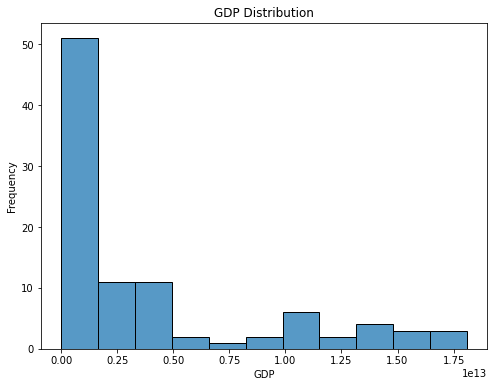

<Figure size 432x288 with 0 Axes>

In [74]:
plt.figure(figsize=(8, 6))
sns.histplot(df.GDP)
plt.title('GDP Distribution')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()
plt.clf()

We can see that the distribution of GDP is skewed right. This is because the GDP of the USA, China, and Germany are so much higher than that of Mexico, Chile, and Zimbabwe. This makes it so that our lowest range bin contains all the observations of GDP from those three nations. It would be more useful to make a histogram of the GDP per capita but we do not have that data. We can also look at the distribution of the Log base 10 of the GDP.

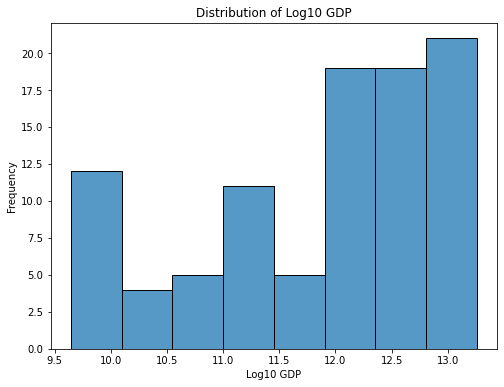

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure(figsize=(8, 6))
sns.histplot(df.log_GDP)
plt.title('Distribution of Log10 GDP')
plt.xlabel('Log10 GDP')
plt.ylabel('Frequency')
plt.show()
plt.clf()

## Conclusions

Throughout this project we used data analysis and visualizations to answer the questions we posed at the beginning.

- Has life expectancy increased over time in the six nations?
    - In all six nations life expectancy increased with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - In all six nations life expectancy increased with China having the greatest increase.
- Is there a correlation between GDP and life expectancy of a country?
    - There is a correlation between GDP and life expectancy, it is weak in all nations but strong individually.
- What is the average life expectancy in these nations?
    - In all the nations life expectancy averaged between 75 and 80 except in Zimbabwe where it averaged about 50.
- What is the distribution of that life expectancy?
    - The histogram of life expectancy was skewed left. When Zimbabwe was removed the shape became more normal. We hypothesized that with data on more nations restricted to one period of time that the distribution would be normal.
- What is the average GDP in these nations?
    - The average GDP of each nation was very different with the USA having the highest at around 14 trillion US dollars and Zimbabwe having the lowest at 9 billion US dollars.
- What is the distribution of GDP?
    - The histogram of GDP was right skewed because the scale of the GDP for the USA and China was much greater than that of Zimbabwe, Chile, and Mexico. We would prefer to examine the GDP per capita distribution but that data was not available.